In [1]:
# imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.modeling import modeling_functions as mf

In [2]:
df = pd.read_csv('../leana_m3')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,zipcode,...,z_bldgr_3,z_bldgr_4,z_bldgr_5,z_bldgr_6,z_bldgr_7,z_bldgr_8,z_bldgr_9,z_bldgr_10,z_bldgr_11,z_bldgr_12
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,98102.0,...,-0.01285,-0.032353,-0.106291,-0.32604,-0.820224,1.504967,-0.388321,-0.211638,-0.092149,-0.025707
1,2019-05-04,890000.0,12,6,3,N,N,1,8,98011.0,...,-0.01285,-0.032353,-0.106291,-0.32604,1.219112,-0.664430,-0.388321,-0.211638,-0.092149,-0.025707
2,2019-11-05,640000.0,11,6,3,N,N,1,8,98125.0,...,-0.01285,-0.032353,-0.106291,-0.32604,1.219112,-0.664430,-0.388321,-0.211638,-0.092149,-0.025707
3,2019-01-25,645000.0,11,6,3,N,N,1,8,98028.0,...,-0.01285,-0.032353,-0.106291,-0.32604,1.219112,-0.664430,-0.388321,-0.211638,-0.092149,-0.025707
4,2019-10-05,907000.0,11,6,3,N,N,1,8,98005.0,...,-0.01285,-0.032353,-0.106291,-0.32604,-0.820224,1.504967,-0.388321,-0.211638,-0.092149,-0.025707


In [3]:
df['zipcode'] = df['zipcode'].astype(str)

In [4]:
df['zipcode'] = df['zipcode'].apply(lambda x: x[:5])

In [5]:
df = df[~(df['zipcode'] == 'nan')]

In [6]:
df = df[df['zipcode'] != '98.0']

In [7]:
df.shape

(15807, 109)

there's some loss in data after dropping nans and two digit entries for zipcodes. Down to 15807 entries

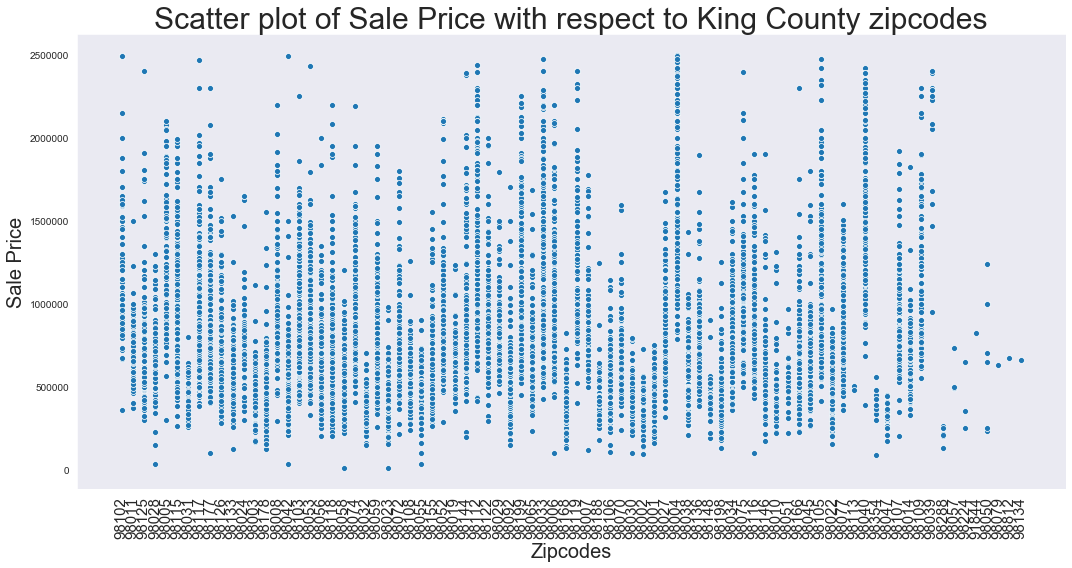

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'zipcode', y = 'saleprice', data = df) #scatter_kws={"color": "#0055AA"}, line_kws={"color": "#9b59b6"});
ax.set_title('Scatter plot of Sale Price with respect to King County zipcodes', fontsize = 30)
ax.tick_params(axis='x',labelrotation=90, labelsize=15)
plt.xlabel('Zipcodes', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
plt.tight_layout();

the spread of the saleprice seems to have a pattern (a wavy one at that), if the zipcodes were arranged from low to high priced areas a more clear picture can be drawn

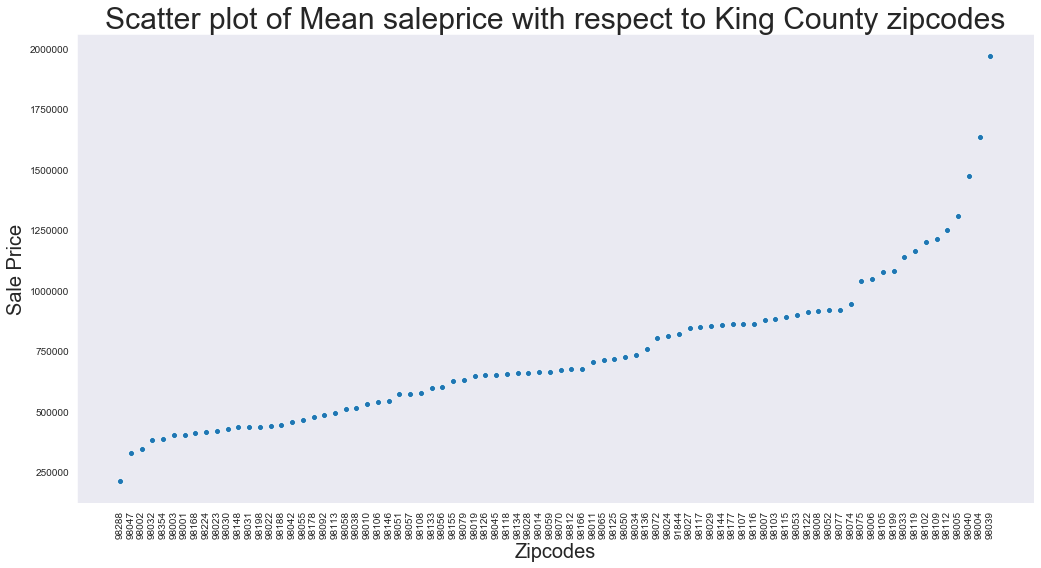

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=df.groupby(['zipcode']).mean()['saleprice'].sort_values())
ax.tick_params(axis='x',labelrotation=90, labelsize=10)
plt.xlabel('Zipcodes', fontsize = 20)
plt.ylabel('Sale Price', fontsize = 20)
ax.set_title('Scatter plot of Mean saleprice with respect to King County zipcodes', fontsize = 30)
plt.tight_layout();

That looks promising...

In [10]:
df['zipcode'] = df['zipcode'].astype('category')

In [11]:
df.zipcode.dtype

CategoricalDtype(categories=['91844', '98001', '98002', '98003', '98004', '98005',
                  '98006', '98007', '98008', '98010', '98011', '98014',
                  '98019', '98022', '98023', '98024', '98027', '98028',
                  '98029', '98030', '98031', '98032', '98033', '98034',
                  '98038', '98039', '98040', '98042', '98045', '98047',
                  '98050', '98051', '98052', '98053', '98055', '98056',
                  '98057', '98058', '98059', '98065', '98070', '98072',
                  '98074', '98075', '98077', '98079', '98092', '98102',
                  '98103', '98105', '98106', '98107', '98108', '98109',
                  '98112', '98113', '98115', '98116', '98117', '98118',
                  '98119', '98122', '98125', '98126', '98133', '98134',
                  '98136', '98144', '98146', '98148', '98155', '98166',
                  '98168', '98177', '98178', '98188', '98198', '98199',
                  '98224', '98288', '98354', '98812']

In [12]:
# create dummies
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zip_', drop_first=True)

In [13]:
# drop existing zipcode variable to be replaced by dummies
df = df.drop('zipcode', axis=1)

In [14]:
df = pd.concat([df, zipcode_dummies], axis=1)

In [15]:
df.head()

,documentdate,saleprice,propertytype,principaluse,saleinstrument,currentuseland,historicproperty,salereason,propertyclass,streettype,...,zip__98168,zip__98177,zip__98178,zip__98188,zip__98198,zip__98199,zip__98224,zip__98288,zip__98354,zip__98812
0,2019-04-01,1065000.0,12,6,3,N,N,1,8,ST,...,0,0,0,0,0,0,0,0,0,0
1,2019-05-04,890000.0,12,6,3,N,N,1,8,AVE,...,0,0,0,0,0,0,0,0,0,0
2,2019-11-05,640000.0,11,6,3,N,N,1,8,ST,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-25,645000.0,11,6,3,N,N,1,8,AVE,...,0,0,0,0,0,0,0,0,0,0
4,2019-10-05,907000.0,11,6,3,N,N,1,8,ST,...,0,0,0,0,0,0,0,0,0,0


In [16]:
zipcode_cols = []
for column in df.columns:
    if column.startswith('zip'):
        zipcode_cols.append(column)
        
features18 = ['saleprice', 'ctr_squarefeettotalliving', 'ctr_bathtotcount', 'ctr_squarefeetdeck',
              'ctr_sqftporch'] + zipcode_cols

In [17]:
model18 = mf.model(features18, df, 'saleprice')

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     559.0
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:40:14   Log-Likelihood:            -2.1370e+05
No. Observations:               15807   AIC:                         4.276e+05
Df Residuals:                   15721   BIC:                         4.282e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

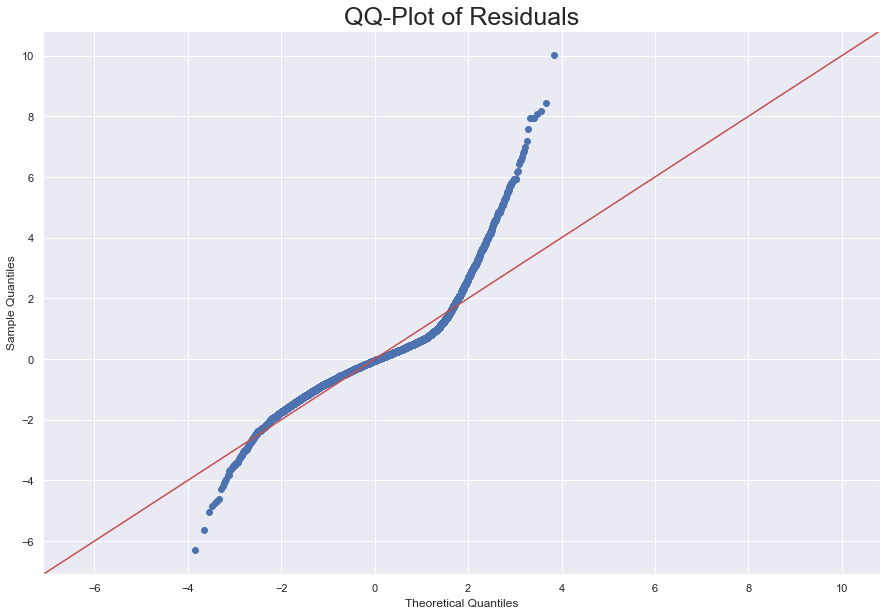

In [35]:
mf.normality_assumption(model18)

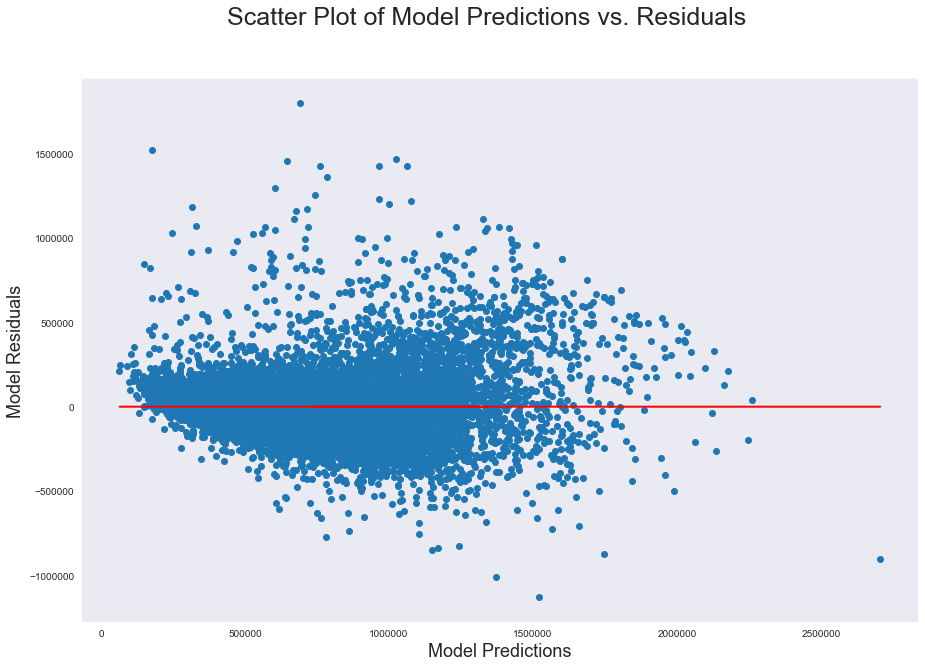

In [19]:
mf.homo_assumption(model18, df)

That was a good increase in R squared, but our normality assumption doesn't look the best. Only about 50% of the residuls seem to follow a normal distribution.

## Model 19 ##

same model as before, just taking the z scores for all the variables involved

In [26]:
features19 = ['saleprice',
              'squarefeettotalliving',
              'bathtotcount',
              'squarefeetdeck',
              'sqftporch'] + zipcode_cols

In [30]:
for feature in features19:
    mf.z_score(feature, df)

In [31]:
features19z = list(map(lambda x: 'z_' + x, features19))

In [32]:
model19 = mf.model(features19z, df, 'z_saleprice')

                            OLS Regression Results                            
Dep. Variable:            z_saleprice   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     559.0
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:44:09   Log-Likelihood:                -11428.
No. Observations:               15807   AIC:                         2.303e+04
Df Residuals:                   15721   BIC:                         2.369e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -7

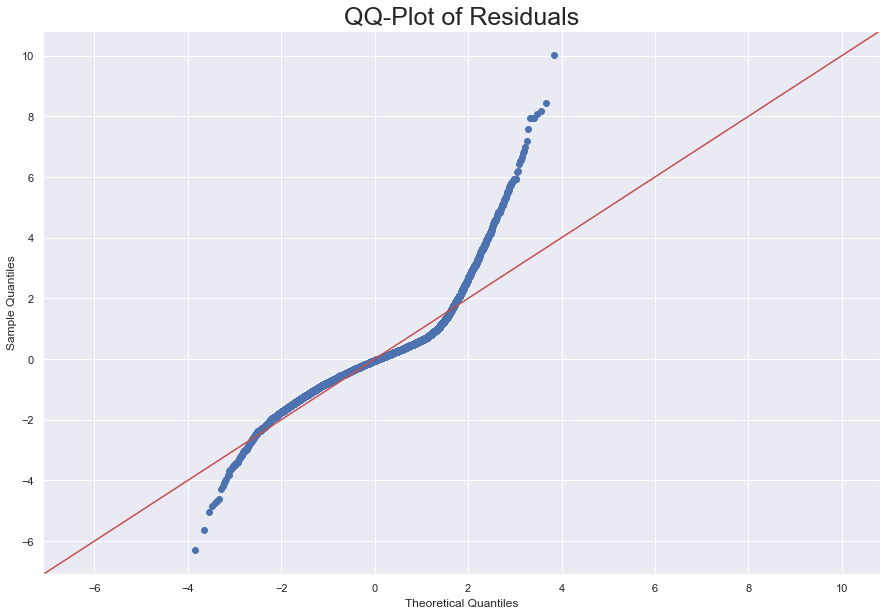

In [33]:
mf.normality_assumption(model19)

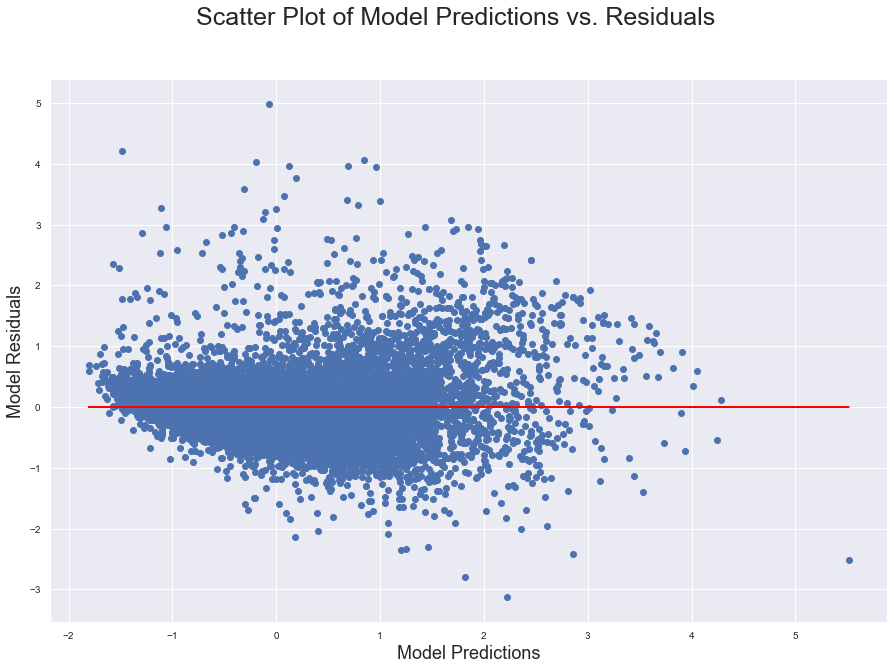

In [34]:
mf.homo_assumption(model19, df)

multicollinearity reduced after taking z scores